<font color='red' size=5><b> Software Requirements: The below scripts are tested in Python version 3.6.1 and Seaborn version 0.7.1</b> </font><br>   
 
# <font color='blue'>Hackathon: Pro Kabaddi League</font> <br>
# <font color='blue'> Important Instructions: Execute this fourth after the web scraping files </font>
## <font color='blue'> Setup Working directory, copy files, execute scripts </font>
<font color='blue'> <br>
1) Copy input CSV files into your home/working directory <br>
2) To perform web scraping, please copy the provided Chrome Driver into the working directory
2) Copy this ipython (ipynb) notebook into your home/working directory <br>
3) Ensure that the CSV files and this ipython notebook (ipynb) are in the home/working directory <br>
4) Execute below scripts by sequence order </font> <br>

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import RidgeCV
from sklearn import metrics
from sklearn.cross_validation import KFold
from scipy import stats
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')
#Print the plot within the page
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Importing data and creating a dataframe for analysis

In [2]:
#Import data
team_u_mumba = pd.read_csv("u-mumba.csv")
team_telugu_titans = pd.read_csv("telugu-titans.csv")
team_puneri_paltan = pd.read_csv("puneri-paltan.csv")
team_patna_pirates = pd.read_csv("patna-pirates.csv")
team_jaipur_pink_panthers = pd.read_csv("jaipur-pink-panthers.csv")
team_up_yoddha = pd.read_csv("up-yoddha.csv")
team_tamil_thalaivas = pd.read_csv("tamil-thalaivas.csv")
team_haryana_steelers = pd.read_csv("haryana-steelers.csv")
team_gujarat_fortunegiants = pd.read_csv("gujarat-fortunegiants.csv")
team_dabang_delhi_kc = pd.read_csv("dabang-delhi-kc.csv")
team_bengaluru_bulls = pd.read_csv("bengaluru-bulls.csv")
team_bengal_warriors = pd.read_csv("bengal-warriors.csv")

In [3]:
#Function to format data
def transpose_df(df):
    #team_u_mumba = team_u_mumba.drop(['Overall'],axis=1)
#team_u_mumba = team_u_mumba.set_index('Stat_desc') 
    team_name = df['Team'].iloc[0]
    df.drop(['Team'], axis=1,inplace=True)
    df_transpose = df.T.rename_axis('Stat_desc').rename_axis(None, 1).reset_index()
    df_transpose.rename(columns={'Stat_desc':'Season'}, inplace=True)
    df_transpose.columns = df_transpose.iloc[0]
    df_transpose.reset_index()
    df_transpose.drop([0], axis=0,inplace=True)
    df_transpose['team_name'] = team_name
#team_u_mumba_transpose.reset_index(inplace=True)
#team_u_mumba_transpose.rename_axis('Stat_desc')
#team_u_mumba_transpose.rename(columns={'index':'Season'}, inplace=True)
    return df_transpose
    

In [4]:
teams = ["team_u_mumba","team_telugu_titans","team_puneri_paltan","team_patna_pirates",
         "team_jaipur_pink_panthers","team_up_yoddha","team_tamil_thalaivas","team_haryana_steelers",
         "team_gujarat_fortunegiants","team_dabang_delhi_kc","team_bengaluru_bulls","team_bengal_warriors"]
team_u_mumba_t = transpose_df(team_u_mumba)
team_telugu_titans_t = transpose_df(team_telugu_titans)
team_puneri_paltan_t = transpose_df(team_puneri_paltan)
team_patna_pirates_t = transpose_df(team_patna_pirates)
team_jaipur_pink_panthers_t = transpose_df(team_jaipur_pink_panthers)
team_up_yoddha_t = transpose_df(team_up_yoddha)
team_tamil_thalaivas_t = transpose_df(team_tamil_thalaivas)
team_haryana_steelers_t = transpose_df(team_haryana_steelers)
team_gujarat_fortunegiants_t = transpose_df(team_gujarat_fortunegiants)
team_dabang_delhi_kc_t = transpose_df(team_dabang_delhi_kc)
team_bengaluru_bulls_t = transpose_df(team_bengaluru_bulls)
team_bengal_warriors_t = transpose_df(team_bengal_warriors)

team_final_df = pd.DataFrame()
team_final_df = pd.concat([team_u_mumba_t,team_telugu_titans_t,team_puneri_paltan_t,team_patna_pirates_t,team_jaipur_pink_panthers_t,team_up_yoddha_t,
                           team_tamil_thalaivas_t,team_haryana_steelers_t,team_gujarat_fortunegiants_t,team_dabang_delhi_kc_t,
                           team_bengaluru_bulls_t,team_bengal_warriors_t])

team_final_df.rename(columns={'Stat_desc':'Season'}, inplace=True)
team_final_df

,Season,Matches Played,wins,draws,losses,Finishing Position,highest score,Biggest Winning Margin,Total Raids,Successful Raids,...,Total Raid Points,Total Tackles,successful tackles,unsuccesful tackles,successful tackle %,no. of super tackles,all outs inflicted,total all out points,total defence points,team_name
1,Overall,126,78,7,41,-,--53-vs---,---27-----26--vs---53----,5312,1803,...,2267,2892,1216,1676,46%,104,171,342,1317,u-mumba
2,Season1,16,9,3,4,2,--45-vs---,---16-----44--vs---28----,624,270,...,347,409,145,264,38%,12,21,42,157,u-mumba
3,Season2,16,14,0,2,1,--39-vs---,---17-----35--vs---18----,697,187,...,237,364,180,184,54%,16,20,40,196,u-mumba
4,Season3,16,13,0,3,1,--41-vs---,---21-----18--vs---39----,685,206,...,253,329,163,166,51%,6,27,54,169,u-mumba
5,Season4,14,7,1,6,4,--38-vs---,---8-----18--vs---26----,594,188,...,227,293,110,183,41%,11,15,30,121,u-mumba
6,Season5,22,10,0,12,4,--51-vs---,---14-----36--vs---22----,963,322,...,419,539,176,363,37%,26,21,42,202,u-mumba
7,Season6,23,15,2,6,2,--53-vs---,---27-----26--vs---53----,978,372,...,459,558,274,284,52%,15,41,82,289,u-mumba
8,Season7,19,10,1,8,4,--47-vs---,---26-----47--vs---21----,771,258,...,325,400,168,232,46%,18,26,52,183,u-mumba
1,Overall,122,50,15,57,-,--60-vs---,---36-----60--vs---24----,5240,1843,...,2286,2807,1067,1740,42%,115,142,284,1176,telugu-titans
2,Season1,14,6,3,5,5,--60-vs---,---36-----60--vs---24----,569,272,...,336,333,96,237,31%,8,25,50,104,telugu-titans


In [5]:
team_final_df

,Season,Matches Played,wins,draws,losses,Finishing Position,highest score,Biggest Winning Margin,Total Raids,Successful Raids,...,Total Raid Points,Total Tackles,successful tackles,unsuccesful tackles,successful tackle %,no. of super tackles,all outs inflicted,total all out points,total defence points,team_name
1,Overall,126,78,7,41,-,--53-vs---,---27-----26--vs---53----,5312,1803,...,2267,2892,1216,1676,46%,104,171,342,1317,u-mumba
2,Season1,16,9,3,4,2,--45-vs---,---16-----44--vs---28----,624,270,...,347,409,145,264,38%,12,21,42,157,u-mumba
3,Season2,16,14,0,2,1,--39-vs---,---17-----35--vs---18----,697,187,...,237,364,180,184,54%,16,20,40,196,u-mumba
4,Season3,16,13,0,3,1,--41-vs---,---21-----18--vs---39----,685,206,...,253,329,163,166,51%,6,27,54,169,u-mumba
5,Season4,14,7,1,6,4,--38-vs---,---8-----18--vs---26----,594,188,...,227,293,110,183,41%,11,15,30,121,u-mumba
6,Season5,22,10,0,12,4,--51-vs---,---14-----36--vs---22----,963,322,...,419,539,176,363,37%,26,21,42,202,u-mumba
7,Season6,23,15,2,6,2,--53-vs---,---27-----26--vs---53----,978,372,...,459,558,274,284,52%,15,41,82,289,u-mumba
8,Season7,19,10,1,8,4,--47-vs---,---26-----47--vs---21----,771,258,...,325,400,168,232,46%,18,26,52,183,u-mumba
1,Overall,122,50,15,57,-,--60-vs---,---36-----60--vs---24----,5240,1843,...,2286,2807,1067,1740,42%,115,142,284,1176,telugu-titans
2,Season1,14,6,3,5,5,--60-vs---,---36-----60--vs---24----,569,272,...,336,333,96,237,31%,8,25,50,104,telugu-titans


In [8]:
#format winning margin data
import re
for i, row in team_final_df.iterrows():
    try:
        score = re.search('---(.+?)-----', row['Biggest Winning Margin']).group(1)
        row['Biggest Winning Margin'] = score
    except AttributeError:
    # AAA, ZZZ not found in the original string
        score = ''
team_final_df

,Season,Matches Played,wins,draws,losses,Finishing Position,highest score,Biggest Winning Margin,Total Raids,Successful Raids,...,Total Raid Points,Total Tackles,successful tackles,unsuccesful tackles,successful tackle %,no. of super tackles,all outs inflicted,total all out points,total defence points,team_name
1,Overall,126,78,7,41,-,--53-vs---,27,5312,1803,...,2267,2892,1216,1676,46%,104,171,342,1317,u-mumba
2,Season1,16,9,3,4,2,--45-vs---,16,624,270,...,347,409,145,264,38%,12,21,42,157,u-mumba
3,Season2,16,14,0,2,1,--39-vs---,17,697,187,...,237,364,180,184,54%,16,20,40,196,u-mumba
4,Season3,16,13,0,3,1,--41-vs---,21,685,206,...,253,329,163,166,51%,6,27,54,169,u-mumba
5,Season4,14,7,1,6,4,--38-vs---,8,594,188,...,227,293,110,183,41%,11,15,30,121,u-mumba
6,Season5,22,10,0,12,4,--51-vs---,14,963,322,...,419,539,176,363,37%,26,21,42,202,u-mumba
7,Season6,23,15,2,6,2,--53-vs---,27,978,372,...,459,558,274,284,52%,15,41,82,289,u-mumba
8,Season7,19,10,1,8,4,--47-vs---,26,771,258,...,325,400,168,232,46%,18,26,52,183,u-mumba
1,Overall,122,50,15,57,-,--60-vs---,36,5240,1843,...,2286,2807,1067,1740,42%,115,142,284,1176,telugu-titans
2,Season1,14,6,3,5,5,--60-vs---,36,569,272,...,336,333,96,237,31%,8,25,50,104,telugu-titans


In [9]:
#format highest score data
import re
for i, row in team_final_df.iterrows():
    try:
        score = re.search('--(.+?)-vs', row['highest score']).group(1)
        row['highest score'] = score
    except AttributeError:
    # AAA, ZZZ not found in the original string
        score = ''
team_final_df

,Season,Matches Played,wins,draws,losses,Finishing Position,highest score,Biggest Winning Margin,Total Raids,Successful Raids,...,Total Raid Points,Total Tackles,successful tackles,unsuccesful tackles,successful tackle %,no. of super tackles,all outs inflicted,total all out points,total defence points,team_name
1,Overall,126,78,7,41,-,53,27,5312,1803,...,2267,2892,1216,1676,46%,104,171,342,1317,u-mumba
2,Season1,16,9,3,4,2,45,16,624,270,...,347,409,145,264,38%,12,21,42,157,u-mumba
3,Season2,16,14,0,2,1,39,17,697,187,...,237,364,180,184,54%,16,20,40,196,u-mumba
4,Season3,16,13,0,3,1,41,21,685,206,...,253,329,163,166,51%,6,27,54,169,u-mumba
5,Season4,14,7,1,6,4,38,8,594,188,...,227,293,110,183,41%,11,15,30,121,u-mumba
6,Season5,22,10,0,12,4,51,14,963,322,...,419,539,176,363,37%,26,21,42,202,u-mumba
7,Season6,23,15,2,6,2,53,27,978,372,...,459,558,274,284,52%,15,41,82,289,u-mumba
8,Season7,19,10,1,8,4,47,26,771,258,...,325,400,168,232,46%,18,26,52,183,u-mumba
1,Overall,122,50,15,57,-,60,36,5240,1843,...,2286,2807,1067,1740,42%,115,142,284,1176,telugu-titans
2,Season1,14,6,3,5,5,60,36,569,272,...,336,333,96,237,31%,8,25,50,104,telugu-titans


In [10]:
#format Successful tackle %
import re
for i, row in team_final_df.iterrows():
    try:
        score = re.search('(.+?)%', row['successful tackle %']).group(1)
        row['successful tackle %'] = score
    except AttributeError:
    # AAA, ZZZ not found in the original string
        score = ''
team_final_df

,Season,Matches Played,wins,draws,losses,Finishing Position,highest score,Biggest Winning Margin,Total Raids,Successful Raids,...,Total Raid Points,Total Tackles,successful tackles,unsuccesful tackles,successful tackle %,no. of super tackles,all outs inflicted,total all out points,total defence points,team_name
1,Overall,126,78,7,41,-,53,27,5312,1803,...,2267,2892,1216,1676,46,104,171,342,1317,u-mumba
2,Season1,16,9,3,4,2,45,16,624,270,...,347,409,145,264,38,12,21,42,157,u-mumba
3,Season2,16,14,0,2,1,39,17,697,187,...,237,364,180,184,54,16,20,40,196,u-mumba
4,Season3,16,13,0,3,1,41,21,685,206,...,253,329,163,166,51,6,27,54,169,u-mumba
5,Season4,14,7,1,6,4,38,8,594,188,...,227,293,110,183,41,11,15,30,121,u-mumba
6,Season5,22,10,0,12,4,51,14,963,322,...,419,539,176,363,37,26,21,42,202,u-mumba
7,Season6,23,15,2,6,2,53,27,978,372,...,459,558,274,284,52,15,41,82,289,u-mumba
8,Season7,19,10,1,8,4,47,26,771,258,...,325,400,168,232,46,18,26,52,183,u-mumba
1,Overall,122,50,15,57,-,60,36,5240,1843,...,2286,2807,1067,1740,42,115,142,284,1176,telugu-titans
2,Season1,14,6,3,5,5,60,36,569,272,...,336,333,96,237,31,8,25,50,104,telugu-titans


In [11]:
#check the columns and it's type
team_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 1 to 8
Data columns (total 26 columns):
Season                    80 non-null object
Matches Played            80 non-null object
wins                      80 non-null object
draws                     80 non-null object
losses                    80 non-null object
Finishing Position        80 non-null object
highest score             80 non-null object
Biggest Winning Margin    80 non-null object
Total Raids               80 non-null object
Successful Raids          80 non-null object
unsuccessful raid         80 non-null object
empty raids               80 non-null object
success raid %            80 non-null object
no. of super raids        80 non-null object
raid touch points         80 non-null object
raid bonus points         80 non-null object
Total Raid Points         80 non-null object
Total Tackles             80 non-null object
successful tackles        80 non-null object
unsuccesful tackles       80 non-null objec

In [12]:
#remove % string as it cannot be converted into numberic
team_final_df['success raid %'] = team_final_df['success raid %'].str.replace('%','')
team_final_df['successful tackle %'] = team_final_df['successful tackle %'].str.replace('%','')
team_final_df['successful tackle %']

1    46
2    38
3    54
4    51
5    41
6    37
7    52
8    46
1    42
2    31
3    43
4    38
5    44
6    41
7    48
8    44
1    43
2    29
3    37
4    50
5    42
6    50
7    44
8    42
1    42
2    37
3    44
4    45
5    52
6    40
     ..
3    34
4    41
1    49
2    51
3    47
4    49
1    38
2    36
3    41
4    32
5    44
6    34
7    39
8    39
1    43
2    46
3    48
4    34
5    43
6    42
7    42
8    44
1    39
2    32
3    44
4    46
5    39
6    37
7    39
8    41
Name: successful tackle %, Length: 80, dtype: object

In [13]:
#Remove - from the finishing position otherwise cannot be converted to numberic
team_final_df['Finishing Position'].replace('-', '0', inplace=True)
team_final_df

,Season,Matches Played,wins,draws,losses,Finishing Position,highest score,Biggest Winning Margin,Total Raids,Successful Raids,...,Total Raid Points,Total Tackles,successful tackles,unsuccesful tackles,successful tackle %,no. of super tackles,all outs inflicted,total all out points,total defence points,team_name
1,Overall,126,78,7,41,0,53,27,5312,1803,...,2267,2892,1216,1676,46,104,171,342,1317,u-mumba
2,Season1,16,9,3,4,2,45,16,624,270,...,347,409,145,264,38,12,21,42,157,u-mumba
3,Season2,16,14,0,2,1,39,17,697,187,...,237,364,180,184,54,16,20,40,196,u-mumba
4,Season3,16,13,0,3,1,41,21,685,206,...,253,329,163,166,51,6,27,54,169,u-mumba
5,Season4,14,7,1,6,4,38,8,594,188,...,227,293,110,183,41,11,15,30,121,u-mumba
6,Season5,22,10,0,12,4,51,14,963,322,...,419,539,176,363,37,26,21,42,202,u-mumba
7,Season6,23,15,2,6,2,53,27,978,372,...,459,558,274,284,52,15,41,82,289,u-mumba
8,Season7,19,10,1,8,4,47,26,771,258,...,325,400,168,232,46,18,26,52,183,u-mumba
1,Overall,122,50,15,57,0,60,36,5240,1843,...,2286,2807,1067,1740,42,115,142,284,1176,telugu-titans
2,Season1,14,6,3,5,5,60,36,569,272,...,336,333,96,237,31,8,25,50,104,telugu-titans


In [14]:
cols = list(team_final_df.columns)
col_list = [e for e in cols if e not in ('Season', 'team_name')]
col_list

['Matches Played',
 'wins',
 'draws',
 'losses',
 'Finishing Position',
 'highest score',
 'Biggest Winning Margin',
 'Total Raids',
 'Successful Raids',
 'unsuccessful raid',
 'empty raids',
 'success raid %',
 'no. of super raids',
 'raid touch points',
 'raid bonus points',
 'Total Raid Points',
 'Total Tackles',
 'successful tackles',
 'unsuccesful tackles',
 'successful tackle %',
 'no. of super tackles',
 'all outs inflicted',
 'total all out points',
 'total defence points']

In [15]:
#Convert all columns to numeric for analysis later
team_final_df[col_list] = team_final_df[col_list].apply(pd.to_numeric)
team_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 1 to 8
Data columns (total 26 columns):
Season                    80 non-null object
Matches Played            80 non-null int64
wins                      80 non-null int64
draws                     80 non-null int64
losses                    80 non-null int64
Finishing Position        80 non-null int64
highest score             80 non-null int64
Biggest Winning Margin    80 non-null int64
Total Raids               80 non-null int64
Successful Raids          80 non-null int64
unsuccessful raid         80 non-null int64
empty raids               80 non-null int64
success raid %            80 non-null int64
no. of super raids        80 non-null int64
raid touch points         80 non-null int64
raid bonus points         80 non-null int64
Total Raid Points         80 non-null int64
Total Tackles             80 non-null int64
successful tackles        80 non-null int64
unsuccesful tackles       80 non-null int64
successful tackle

In [16]:
team_final_df['team_name'].unique()

array(['u-mumba', 'telugu-titans', 'puneri-paltan', 'patna-pirates',
       'jaipur-pink-panthers', 'up-yoddha', 'tamil-thalaivas',
       'haryana-steelers', 'gujarat-fortunegiants', 'dabang-delhi-kc',
       'bengaluru-bulls', 'bengal-warriors'], dtype=object)

In [17]:
#Make the season column numeric and format team names for consistency 
team_final_df1 = team_final_df.copy()

#team_final_df1.rename(columns={'Season':'season'}, inplace=True)
#team_final_df1.head()
team_final_df1['Season'] = team_final_df1['Season'].str.replace('Overall','0')
team_final_df1['Season'] = team_final_df1['Season'].str.replace('Season1','1')
team_final_df1['Season'] = team_final_df1['Season'].str.replace('Season2','2')
team_final_df1['Season'] = team_final_df1['Season'].str.replace('Season3','3')
team_final_df1['Season'] = team_final_df1['Season'].str.replace('Season4','4')
team_final_df1['Season'] = team_final_df1['Season'].str.replace('Season5','5')
team_final_df1['Season'] = team_final_df1['Season'].str.replace('Season6','6')
team_final_df1['Season'] = team_final_df1['Season'].str.replace('Season7','7')
team_final_df1['team_name'] = team_final_df1['team_name'].str.replace('bengal-warriors','Bengal Warriors')
team_final_df1['team_name'] = team_final_df1['team_name'].str.replace('bengaluru-bulls','Bengaluru Bulls')
team_final_df1['team_name'] = team_final_df1['team_name'].str.replace('dabang-delhi-kc','Dabang Delhi K.C.')
team_final_df1['team_name'] = team_final_df1['team_name'].str.replace('gujarat-fortunegiants','Gujarat Fortunegiants')
team_final_df1['team_name'] = team_final_df1['team_name'].str.replace('haryana-steelers','Haryana Steelers')
team_final_df1['team_name'] = team_final_df1['team_name'].str.replace('jaipur-pink-panthers','Jaipur Pink Panthers')
team_final_df1['team_name'] = team_final_df1['team_name'].str.replace('patna-pirates','Patna Pirates')
team_final_df1['team_name'] = team_final_df1['team_name'].str.replace('puneri-paltan','Puneri Paltan')
team_final_df1['team_name'] = team_final_df1['team_name'].str.replace('tamil-thalaivas','Tamil Thalaivas')
team_final_df1['team_name'] = team_final_df1['team_name'].str.replace('telugu-titans','Telugu Titans')
team_final_df1['team_name'] = team_final_df1['team_name'].str.replace('u-mumba','U Mumba')
team_final_df1['team_name'] = team_final_df1['team_name'].str.replace('up-yoddha','U.P. Yoddha')
team_final_df1.reset_index(inplace = True, drop = True) 
team_final_df1['Season'] = pd.to_numeric(team_final_df1['Season'])
#team_final_df1['team_name'] = pd.to_numeric(team_final_df1['team_name'])

In [19]:
#Download the data into CSV file
team_final_df1.to_csv('team_statsv3.csv',index=False)

In [20]:
#Total point is missing from the above dataframe. So adding it from other CSV files
total_points_overall = pd.read_csv("prokabaddi_team_total-points-conceded_0.csv")
total_points_season1 = pd.read_csv("prokabaddi_team_total-points-conceded_1.csv")
total_points_season2 = pd.read_csv("prokabaddi_team_total-points-conceded_2.csv")
total_points_season3 = pd.read_csv("prokabaddi_team_total-points-conceded_3.csv")
total_points_season4 = pd.read_csv("prokabaddi_team_total-points-conceded_4.csv")
total_points_season5 = pd.read_csv("prokabaddi_team_total-points-conceded_5.csv")
total_points_season6 = pd.read_csv("prokabaddi_team_total-points-conceded_6.csv")
total_points_season7 = pd.read_csv("prokabaddi_team_total-points-conceded_7.csv")

team_points = pd.concat([total_points_overall ,total_points_season1 ,total_points_season2 ,total_points_season3 ,total_points_season4 ,total_points_season5 ,total_points_season6 ,total_points_season7])
team_points

,team_name,Season,matches_played,total-points
0,Patna Pirates,0,131,4307
1,Dabang Delhi K.C.,0,122,4086
2,Puneri Paltan,0,126,4025
3,Bengal Warriors,0,125,3946
4,Bengaluru Bulls,0,125,3907
5,Jaipur Pink Panthers,0,124,3881
6,Telugu Titans,0,122,3861
7,U Mumba,0,126,3730
8,Tamil Thalaivas,0,64,2188
9,U.P. Yoddha,0,66,2180


In [21]:
team_final_df1

,Season,Matches Played,wins,draws,losses,Finishing Position,highest score,Biggest Winning Margin,Total Raids,Successful Raids,...,Total Raid Points,Total Tackles,successful tackles,unsuccesful tackles,successful tackle %,no. of super tackles,all outs inflicted,total all out points,total defence points,team_name
0,0,126,78,7,41,0,53,27,5312,1803,...,2267,2892,1216,1676,46,104,171,342,1317,U Mumba
1,1,16,9,3,4,2,45,16,624,270,...,347,409,145,264,38,12,21,42,157,U Mumba
2,2,16,14,0,2,1,39,17,697,187,...,237,364,180,184,54,16,20,40,196,U Mumba
3,3,16,13,0,3,1,41,21,685,206,...,253,329,163,166,51,6,27,54,169,U Mumba
4,4,14,7,1,6,4,38,8,594,188,...,227,293,110,183,41,11,15,30,121,U Mumba
5,5,22,10,0,12,4,51,14,963,322,...,419,539,176,363,37,26,21,42,202,U Mumba
6,6,23,15,2,6,2,53,27,978,372,...,459,558,274,284,52,15,41,82,289,U Mumba
7,7,19,10,1,8,4,47,26,771,258,...,325,400,168,232,46,18,26,52,183,U Mumba
8,0,122,50,15,57,0,60,36,5240,1843,...,2286,2807,1067,1740,42,115,142,284,1176,Telugu Titans
9,1,14,6,3,5,5,60,36,569,272,...,336,333,96,237,31,8,25,50,104,Telugu Titans


In [22]:
#Concat for total points
df_team_data_final1  = pd.DataFrame()
df_team_data_final1 = pd.merge(team_points,team_final_df1, on=['team_name','Season'],how = 'inner' )
df_team_data_final1

,team_name,Season,matches_played,total-points,Matches Played,wins,draws,losses,Finishing Position,highest score,...,raid bonus points,Total Raid Points,Total Tackles,successful tackles,unsuccesful tackles,successful tackle %,no. of super tackles,all outs inflicted,total all out points,total defence points
0,Patna Pirates,0,131,4307,131,68,13,50,0,69,...,518,2633,3121,1176,1945,42,131,193,386,1303
1,Dabang Delhi K.C.,0,122,4086,122,46,9,67,0,60,...,527,2225,2891,998,1893,38,96,141,282,1087
2,Puneri Paltan,0,126,4025,126,49,11,66,0,47,...,438,2116,2989,1159,1830,43,125,134,268,1276
3,Bengal Warriors,0,125,3946,125,56,15,54,0,48,...,487,2236,2835,1025,1810,39,98,133,266,1118
4,Bengaluru Bulls,0,125,3907,125,58,8,59,0,64,...,475,2286,2740,1086,1654,43,93,152,304,1172
5,Jaipur Pink Panthers,0,124,3881,124,53,11,60,0,51,...,440,2144,2784,1055,1729,42,130,137,274,1179
6,Telugu Titans,0,122,3861,122,50,15,57,0,60,...,487,2286,2807,1067,1740,42,115,142,284,1176
7,U Mumba,0,126,3730,126,78,7,41,0,53,...,498,2267,2892,1216,1676,46,104,171,342,1317
8,Tamil Thalaivas,0,64,2188,64,14,9,41,0,46,...,285,1173,1471,518,953,38,45,53,106,561
9,U.P. Yoddha,0,66,2180,66,28,10,28,0,53,...,315,1199,1560,600,960,42,62,70,140,658


In [23]:
#all-outs-conceded is missing from the above dataframe. So adding it from the other CSV files
all_outs_conceded_0 = pd.read_csv("prokabaddi_team_all-outs-conceded_0.csv")
all_outs_conceded_1 = pd.read_csv("prokabaddi_team_all-outs-conceded_1.csv")
all_outs_conceded_2 = pd.read_csv("prokabaddi_team_all-outs-conceded_2.csv")
all_outs_conceded_3 = pd.read_csv("prokabaddi_team_all-outs-conceded_3.csv")
all_outs_conceded_4 = pd.read_csv("prokabaddi_team_all-outs-conceded_4.csv")
all_outs_conceded_5 = pd.read_csv("prokabaddi_team_all-outs-conceded_5.csv")
all_outs_conceded_6 = pd.read_csv("prokabaddi_team_all-outs-conceded_6.csv")
all_outs_conceded_7 = pd.read_csv("prokabaddi_team_all-outs-conceded_7.csv")

data_allout1 = pd.DataFrame()
data_allout1 = data_allout1.append([all_outs_conceded_0,all_outs_conceded_1,all_outs_conceded_2,all_outs_conceded_3, all_outs_conceded_4, all_outs_conceded_5, all_outs_conceded_6,all_outs_conceded_7])


data_allout1.tail()

,team_name,Season,matches_played,all-outs
7,Gujarat Fortunegiants,7,20,22
8,Haryana Steelers,7,19,21
9,U Mumba,7,19,21
10,Dabang Delhi K.C.,7,20,18
11,Bengal Warriors,7,20,17


In [24]:
#Merge the dataframes for all-outs-conceded
df_team_data_final3  = pd.DataFrame()
df_team_data_final3 = pd.merge(data_allout1,df_team_data_final1, on=['team_name','Season'],how = 'inner' )
df_team_data_final3


,team_name,Season,matches_played_x,all-outs,matches_played_y,total-points,Matches Played,wins,draws,losses,...,raid bonus points,Total Raid Points,Total Tackles,successful tackles,unsuccesful tackles,successful tackle %,no. of super tackles,all outs inflicted,total all out points,total defence points
0,Dabang Delhi K.C.,0,122,168,122,4086,122,46,9,67,...,527,2225,2891,998,1893,38,96,141,282,1087
1,Puneri Paltan,0,126,162,126,4025,126,49,11,66,...,438,2116,2989,1159,1830,43,125,134,268,1276
2,Bengaluru Bulls,0,125,146,125,3907,125,58,8,59,...,475,2286,2740,1086,1654,43,93,152,304,1172
3,Patna Pirates,0,131,145,131,4307,131,68,13,50,...,518,2633,3121,1176,1945,42,131,193,386,1303
4,Jaipur Pink Panthers,0,124,145,124,3881,124,53,11,60,...,440,2144,2784,1055,1729,42,130,137,274,1179
5,Bengal Warriors,0,125,144,125,3946,125,56,15,54,...,487,2236,2835,1025,1810,39,98,133,266,1118
6,U Mumba,0,126,139,126,3730,126,78,7,41,...,498,2267,2892,1216,1676,46,104,171,342,1317
7,Telugu Titans,0,122,132,122,3861,122,50,15,57,...,487,2286,2807,1067,1740,42,115,142,284,1176
8,Tamil Thalaivas,0,64,88,64,2188,64,14,9,41,...,285,1173,1471,518,953,38,45,53,106,561
9,U.P. Yoddha,0,66,84,66,2180,66,28,10,28,...,315,1199,1560,600,960,42,62,70,140,658


In [25]:
#Drop unwanted columns
df_team_data_final3 = df_team_data_final3.drop(['matches_played_x','matches_played_y'],axis=1)
df_team_data_final3

,team_name,Season,all-outs,total-points,Matches Played,wins,draws,losses,Finishing Position,highest score,...,raid bonus points,Total Raid Points,Total Tackles,successful tackles,unsuccesful tackles,successful tackle %,no. of super tackles,all outs inflicted,total all out points,total defence points
0,Dabang Delhi K.C.,0,168,4086,122,46,9,67,0,60,...,527,2225,2891,998,1893,38,96,141,282,1087
1,Puneri Paltan,0,162,4025,126,49,11,66,0,47,...,438,2116,2989,1159,1830,43,125,134,268,1276
2,Bengaluru Bulls,0,146,3907,125,58,8,59,0,64,...,475,2286,2740,1086,1654,43,93,152,304,1172
3,Patna Pirates,0,145,4307,131,68,13,50,0,69,...,518,2633,3121,1176,1945,42,131,193,386,1303
4,Jaipur Pink Panthers,0,145,3881,124,53,11,60,0,51,...,440,2144,2784,1055,1729,42,130,137,274,1179
5,Bengal Warriors,0,144,3946,125,56,15,54,0,48,...,487,2236,2835,1025,1810,39,98,133,266,1118
6,U Mumba,0,139,3730,126,78,7,41,0,53,...,498,2267,2892,1216,1676,46,104,171,342,1317
7,Telugu Titans,0,132,3861,122,50,15,57,0,60,...,487,2286,2807,1067,1740,42,115,142,284,1176
8,Tamil Thalaivas,0,88,2188,64,14,9,41,0,46,...,285,1173,1471,518,953,38,45,53,106,561
9,U.P. Yoddha,0,84,2180,66,28,10,28,0,53,...,315,1199,1560,600,960,42,62,70,140,658


In [26]:
#Reviewing the dataframe to check all columns are converted into numeric for analysis
df_team_data_final3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 79
Data columns (total 28 columns):
team_name                 80 non-null object
Season                    80 non-null int64
all-outs                  80 non-null int64
total-points              80 non-null int64
Matches Played            80 non-null int64
wins                      80 non-null int64
draws                     80 non-null int64
losses                    80 non-null int64
Finishing Position        80 non-null int64
highest score             80 non-null int64
Biggest Winning Margin    80 non-null int64
Total Raids               80 non-null int64
Successful Raids          80 non-null int64
unsuccessful raid         80 non-null int64
empty raids               80 non-null int64
success raid %            80 non-null int64
no. of super raids        80 non-null int64
raid touch points         80 non-null int64
raid bonus points         80 non-null int64
Total Raid Points         80 non-null int64
Total Tackles   

## Loading and cleaning Match Day for all seasons

In [99]:
all_season_result_by_matches = pd.read_csv("all_season_result_by_matches.csv")

In [100]:
all_season_result_by_matches.head()

,match_date,match_result,season
0,"Saturday, 26 July",U Mumba beat Jaipur Pink Panthers (45 - 31),1
1,"Saturday, 26 July",Bengaluru Bulls beat Dabang Delhi (47 - 28),1
2,"Sunday, 27 July",Bengaluru Bulls beat Puneri Paltan (40 - 37),1
3,"Sunday, 27 July",U Mumba beat Bengal Warriors (36 - 25),1
4,"Monday, 28 July",Dabang Delhi beat Puneri Paltan (35 - 31),1


In [101]:
all_season_result_by_matches = all_season_result_by_matches.dropna()
all_season_result_by_matches = all_season_result_by_matches[~all_season_result_by_matches['match_result'].str.contains('Match Drawn')]
all_season_result_by_matches = all_season_result_by_matches[all_season_result_by_matches['match_result']!='Match Tied']
all_season_result_by_matches['match_result'] = all_season_result_by_matches['match_result'].str.replace('Beat', 'beat')
all_season_result_by_matches

,match_date,match_result,season
0,"Saturday, 26 July",U Mumba beat Jaipur Pink Panthers (45 - 31),1
1,"Saturday, 26 July",Bengaluru Bulls beat Dabang Delhi (47 - 28),1
2,"Sunday, 27 July",Bengaluru Bulls beat Puneri Paltan (40 - 37),1
3,"Sunday, 27 July",U Mumba beat Bengal Warriors (36 - 25),1
4,"Monday, 28 July",Dabang Delhi beat Puneri Paltan (35 - 31),1
6,"Tuesday, 29 July",U Mumba beat Patna Pirates (36 - 33),1
7,"Wednesday, 30 July",Bengaluru Bulls beat Bengal Warriors (46 - 30),1
8,"Thursday, 31 July",Jaipur Pink Panthers beat Telugu Titans (46 - 32),1
9,"Thursday, 31 July",Bengal Warriors beat Dabang Delhi (42 - 40),1
10,"Friday, 01 August",Patna Pirates beat Telugu Titans (38 - 35),1


In [102]:
str1 = 'Bengal Warriors beat Telugu Titans (40 - 35)'

str2 = str1.split('beat')
str3 = str2[1].split('(')
str4 = str3[1].split('-')
str5 = str4[1].replace(')','')
print(str2[0].strip())
print(str3[0].strip())
print(str4[0].strip())
print(str5.strip())

Bengal Warriors
Telugu Titans
40
35


In [103]:
df_match_result_win = pd.DataFrame({}, columns=["match_date" , "season","win","score","team_name" ])
df_match_result_lost = pd.DataFrame({}, columns=["match_date" , "season","win","score","team_name" ])
df_match_result_win
df_match_result_lost

,match_date,season,win,score,team_name


In [104]:
win_team =[]
win_score=[]
lost_team = []
lost_score = []
for i, row in all_season_result_by_matches.iterrows():
    str1 = row['match_result']
    if(str1 !=''):
        str2 = str1.split('beat')
        len1 = len(str2)
        if(len1>=1):
            
            
            str3 = str2[1].split('(')
            
            str4 = str3[1].split('-')
            str5 = str4[1].replace(')','')
            
            print(str2[0].strip())
            print(str4[0].strip())
            print(str3[0].strip())
            print(str5.strip())
            win_team.append(str2[0].strip())
            win_score.append(str4[0].strip())
            lost_team.append(str3[0].strip())
            lost_score.append(str5.strip())
            df_match_result_win['match_date'] = row['match_date']
            df_match_result_win['season'] = row['season']
            df_match_result_win['win'] = 1
            df_match_result_win['score'] = str4[0].strip()
            df_match_result_win['team_name'] = str2[0].strip()
    
            df_match_result_lost['match_date'] = row['match_date']
            df_match_result_lost['season'] = row['season']
            df_match_result_lost['win'] = 0
            df_match_result_lost['score'] = str5.strip()
            df_match_result_lost['team_name'] = str3[0].strip()
df_match_result_lost    

U Mumba
45
Jaipur Pink Panthers
31
Bengaluru Bulls
47
Dabang Delhi
28
Bengaluru Bulls
40
Puneri Paltan
37
U Mumba
36
Bengal Warriors
25
Dabang Delhi
35
Puneri Paltan
31
U Mumba
36
Patna Pirates
33
Bengaluru Bulls
46
Bengal Warriors
30
Jaipur Pink Panthers
46
Telugu Titans
32
Bengal Warriors
42
Dabang Delhi
40
Patna Pirates
38
Telugu Titans
35
Bengal Warriors
38
Puneri Paltan
35
Jaipur Pink Panthers
40
Patna Pirates
18
U Mumba
38
Bengal Warriors
29
Telugu Titans
39
Dabang Delhi
35
Puneri Paltan
33
Bengaluru Bulls
31
U Mumba
44
Puneri Paltan
28
Patna Pirates
36
Dabang Delhi
31
U Mumba
45
Bengaluru Bulls
34
Jaipur Pink Panthers
40
Dabang Delhi
31
Dabang Delhi
46
Bengal Warriors
36
Patna Pirates
35
Puneri Paltan
27
Bengal Warriors
40
Telugu Titans
35
Jaipur Pink Panthers
49
Telugu Titans
29
Jaipur Pink Panthers
39
Bengal Warriors
23
Bengaluru Bulls
37
Patna Pirates
35
Telugu Titans
42
Puneri Paltan
36
Bengaluru Bulls
33
U Mumba
30
Puneri Paltan
40
Bengal Warriors
30
Dabang Delhi
29
Bengalu

36
Dabang Delhi K.C.
25
Puneri Paltan
37
Haryana Steelers
25
Patna Pirates
36
Bengaluru Bulls
32
Gujarat Fortunegiants
45
U Mumba
23
Patna Pirates
41
Tamil Thalaivas
39
Haryana Steelers
30
Jaipur Pink Panthers
26
U.P. Yoddha
46
Patna Pirates
41
U Mumba
30
Dabang Delhi K.C.
28
Bengal Warriors
33
Bengaluru Bulls
29
Puneri Paltan
34
Dabang Delhi K.C.
29
Tamil Thalaivas
33
Bengal Warriors
32
Haryana Steelers
42
Dabang Delhi K.C.
24
Tamil Thalaivas
35
Gujarat Fortunegiants
34
Patna Pirates
36
Dabang Delhi K.C.
34
Telugu Titans
41
Jaipur Pink Panthers
34
U.P. Yoddha
45
Dabang Delhi K.C.
16
U Mumba
42
Bengaluru Bulls
30
Telugu Titans
44
Dabang Delhi K.C.
22
Puneri Paltan
33
Tamil Thalaivas
20
Gujarat Fortunegiants
30
Patna Pirates
29
Puneri Paltan
34
U.P. Yoddha
33
Jaipur Pink Panthers
27
Tamil Thalaivas
26
Bengal Warriors
32
Jaipur Pink Panthers
31
U Mumba
33
Tamil Thalaivas
30
Gujarat Fortunegiants
42
Dabang Delhi K.C.
22
Telugu Titans
58
Tamil Thalaivas
37
Haryana Steelers
41
U Mumba
30
U.

,match_date,season,win,score,team_name


In [105]:
df_match_result_win['match_date'] = all_season_result_by_matches['match_date']
df_match_result_win['season'] = all_season_result_by_matches['season']
df_match_result_win['score'] = win_score 
df_match_result_win['team_name'] = win_team
df_match_result_win['win'] = 1
df_match_result_win

,match_date,season,win,score,team_name
0,"Saturday, 26 July",1,1,45,U Mumba
1,"Saturday, 26 July",1,1,47,Bengaluru Bulls
2,"Sunday, 27 July",1,1,40,Bengaluru Bulls
3,"Sunday, 27 July",1,1,36,U Mumba
4,"Monday, 28 July",1,1,35,Dabang Delhi
6,"Tuesday, 29 July",1,1,36,U Mumba
7,"Wednesday, 30 July",1,1,46,Bengaluru Bulls
8,"Thursday, 31 July",1,1,46,Jaipur Pink Panthers
9,"Thursday, 31 July",1,1,42,Bengal Warriors
10,"Friday, 01 August",1,1,38,Patna Pirates


In [106]:
df_match_result_lost['match_date'] = all_season_result_by_matches['match_date']
df_match_result_lost['season'] = all_season_result_by_matches['season']
df_match_result_lost['score'] = lost_score 
df_match_result_lost['team_name'] = lost_team
df_match_result_lost['win'] = 0
df_match_result_lost

,match_date,season,win,score,team_name
0,"Saturday, 26 July",1,0,31,Jaipur Pink Panthers
1,"Saturday, 26 July",1,0,28,Dabang Delhi
2,"Sunday, 27 July",1,0,37,Puneri Paltan
3,"Sunday, 27 July",1,0,25,Bengal Warriors
4,"Monday, 28 July",1,0,31,Puneri Paltan
6,"Tuesday, 29 July",1,0,33,Patna Pirates
7,"Wednesday, 30 July",1,0,30,Bengal Warriors
8,"Thursday, 31 July",1,0,32,Telugu Titans
9,"Thursday, 31 July",1,0,40,Dabang Delhi
10,"Friday, 01 August",1,0,35,Telugu Titans


In [107]:
df_win_lost1 = pd.concat([df_match_result_lost,df_match_result_win],axis=0)
df_win_lost1

,match_date,season,win,score,team_name
0,"Saturday, 26 July",1,0,31,Jaipur Pink Panthers
1,"Saturday, 26 July",1,0,28,Dabang Delhi
2,"Sunday, 27 July",1,0,37,Puneri Paltan
3,"Sunday, 27 July",1,0,25,Bengal Warriors
4,"Monday, 28 July",1,0,31,Puneri Paltan
6,"Tuesday, 29 July",1,0,33,Patna Pirates
7,"Wednesday, 30 July",1,0,30,Bengal Warriors
8,"Thursday, 31 July",1,0,32,Telugu Titans
9,"Thursday, 31 July",1,0,40,Dabang Delhi
10,"Friday, 01 August",1,0,35,Telugu Titans


In [109]:
df_win_lost1.rename(columns={'season':'Season'}, inplace=True)
#Download the data into CSV file
df_win_lost1.to_csv('match_statsv3.csv',index=False)

### Loading the data from the CSV file

In [59]:
df_match_data = pd.read_csv("match_statsv3.csv")
df_match_data

,match_date,Season,win,score,team_name
0,"Saturday, 26 July",1,0,31,Jaipur Pink Panthers
1,"Saturday, 26 July",1,0,28,Dabang Delhi
2,"Sunday, 27 July",1,0,37,Puneri Paltan
3,"Sunday, 27 July",1,0,25,Bengal Warriors
4,"Monday, 28 July",1,0,31,Puneri Paltan
5,"Tuesday, 29 July",1,0,33,Patna Pirates
6,"Wednesday, 30 July",1,0,30,Bengal Warriors
7,"Thursday, 31 July",1,0,32,Telugu Titans
8,"Thursday, 31 July",1,0,40,Dabang Delhi
9,"Friday, 01 August",1,0,35,Telugu Titans


In [60]:
#Merge the dataframes for all-outs-conceded
df_team_match_data_final  = pd.DataFrame()
df_team_match_data_final = pd.merge(df_match_data,df_team_data_final3, on=['team_name','Season'],how = 'inner' )
df_team_match_data_final

,match_date,Season,win,score,team_name,all-outs,total-points,Matches Played,wins,draws,...,raid bonus points,Total Raid Points,Total Tackles,successful tackles,unsuccesful tackles,successful tackle %,no. of super tackles,all outs inflicted,total all out points,total defence points
0,"Saturday, 26 July",1,0,31,Jaipur Pink Panthers,15,458,16,12,1,...,53,344,400,158,242,42,12,29,58,170
1,"Sunday, 17 August",1,0,30,Jaipur Pink Panthers,15,458,16,12,1,...,53,344,400,158,242,42,12,29,58,170
2,"Wednesday, 27 August",1,0,29,Jaipur Pink Panthers,15,458,16,12,1,...,53,344,400,158,242,42,12,29,58,170
3,"Thursday, 31 July",1,1,46,Jaipur Pink Panthers,15,458,16,12,1,...,53,344,400,158,242,42,12,29,58,170
4,"Saturday, 02 August",1,1,40,Jaipur Pink Panthers,15,458,16,12,1,...,53,344,400,158,242,42,12,29,58,170
5,"Tuesday, 05 August",1,1,40,Jaipur Pink Panthers,15,458,16,12,1,...,53,344,400,158,242,42,12,29,58,170
6,"Saturday, 09 August",1,1,49,Jaipur Pink Panthers,15,458,16,12,1,...,53,344,400,158,242,42,12,29,58,170
7,"Sunday, 10 August",1,1,39,Jaipur Pink Panthers,15,458,16,12,1,...,53,344,400,158,242,42,12,29,58,170
8,"Thursday, 14 August",1,1,50,Jaipur Pink Panthers,15,458,16,12,1,...,53,344,400,158,242,42,12,29,58,170
9,"Saturday, 16 August",1,1,41,Jaipur Pink Panthers,15,458,16,12,1,...,53,344,400,158,242,42,12,29,58,170


In [61]:
#Correlation of variables. The highest the correlation value, the more is the impact on target variable
team_match_correlation = df_team_match_data_final.corr()['win'].sort_values()
team_correlation.sort_values(ascending=False)

Successful Raids          1.000000
Season                    0.547164
total-points              0.314727
raid touch points         0.306141
Total Tackles             0.299465
Total Raid Points         0.295372
successful tackles        0.291646
Matches Played            0.287935
total defence points      0.261358
unsuccesful tackles       0.256580
success raid %            0.254471
Total Raids               0.235429
all outs inflicted        0.227433
total all out points      0.227433
unsuccessful raid         0.225426
all-outs                  0.215522
draws                     0.203298
Biggest Winning Margin    0.202184
raid bonus points         0.180424
highest score             0.170914
Finishing Position        0.117968
wins                      0.113736
no. of super raids        0.097463
losses                    0.075224
empty raids               0.016824
successful tackle %      -0.017184
no. of super tackles     -0.078095
Name: Successful Raids, dtype: float64

### Clearly we can see that total points and successful raids are related to win chances

# Predictions using simple EDA analysis
### Without using any algorithms, we can see whether simple univariate or bivariate analysis can predict the outcome

## Task 1: Predict the winner of the tournament. 

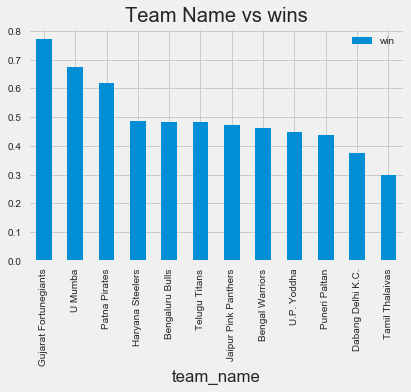

In [72]:
plt.figure(figsize=(18, 6))
#df = df_team_match_data_final[df_team_match_data_final['win']]
#Since overall and Season 1 to 3 are not required as some of the teams are not participated in Season 1, 2,3.
#Filtering Overall as the information is included in the respective season data
df_team_match_stats = df_team_match_data_final.copy()
df_team_match_season7 = df_team_match_data_final.copy()
df_team_match_stats = df_team_match_stats[df_team_match_stats['Season']!=0]
#df_team_match_stats = df_team_match_stats[df_team_match_stats['Season']!=1]
#df_team_match_stats = df_team_match_stats[df_team_match_stats['Season']!=2]
#df_team_match_stats = df_team_match_stats[df_team_match_stats['Season']!=3]
df_team_match_stats = df_team_match_stats[df_team_match_stats['Season']!=7]
#New DataFrame for Season 7 to analysis and compare for prediction
df_team_match_season7 = df_team_match_season7[df_team_match_season7['Season']==7]
df = pd.DataFrame(df_team_match_stats.groupby(['team_name'])['win'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Team Name vs wins')
plt.show()

In [68]:
df_team_match_season7

,match_date,Season,win,score,team_name,all-outs,total-points,Matches Played,wins,draws,...,raid bonus points,Total Raid Points,Total Tackles,successful tackles,unsuccesful tackles,successful tackle %,no. of super tackles,all outs inflicted,total all out points,total defence points
893,"Sunday, 01 September",7,0,29,Bengal Warriors,17,623,20,13,3,...,80,426,472,182,290,41,12,34,68,192
894,"Sunday, 08 September",7,1,42,Bengal Warriors,17,623,20,13,3,...,80,426,472,182,290,41,12,34,68,192
895,"Wednesday, 11 September",7,1,29,Bengal Warriors,17,623,20,13,3,...,80,426,472,182,290,41,12,34,68,192
896,"Thursday, 12 September",7,1,42,Bengal Warriors,17,623,20,13,3,...,80,426,472,182,290,41,12,34,68,192
897,"Thursday, 19 September",7,1,48,Bengal Warriors,17,623,20,13,3,...,80,426,472,182,290,41,12,34,68,192
898,"Sunday, 22 September",7,1,41,Bengal Warriors,17,623,20,13,3,...,80,426,472,182,290,41,12,34,68,192
899,"Wednesday, 25 September",7,1,40,Bengal Warriors,17,623,20,13,3,...,80,426,472,182,290,41,12,34,68,192
900,"Sunday, 01 September",7,0,27,Tamil Thalaivas,30,695,20,3,3,...,79,344,456,160,296,38,13,14,28,171
901,"Monday, 02 September",7,0,30,Tamil Thalaivas,30,695,20,3,3,...,79,344,456,160,296,38,13,14,28,171
902,"Sunday, 08 September",7,0,34,Tamil Thalaivas,30,695,20,3,3,...,79,344,456,160,296,38,13,14,28,171


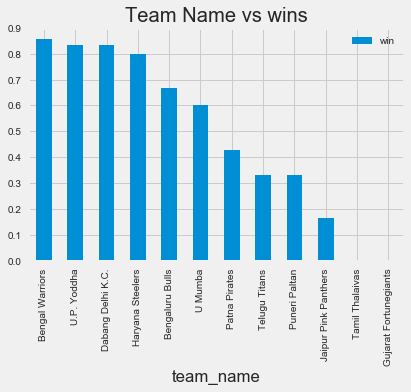

In [71]:
df7 = pd.DataFrame(df_team_match_season7.groupby(['team_name'])['win'].mean().sort_values(ascending = False))
df7.plot.bar()
plt.title('Team Name vs wins')
plt.show()

### Based on the basic analysis we can we some inconsistency in the performance. It may be due to the player shifting team. Based on the above trend we can predict that Bengal Warriors will be the winner of this season7

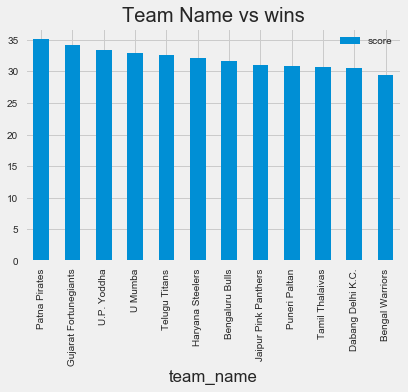

In [80]:
df = pd.DataFrame(df_team_match_stats.groupby(['team_name'])['score'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Team Name vs score')
plt.show()

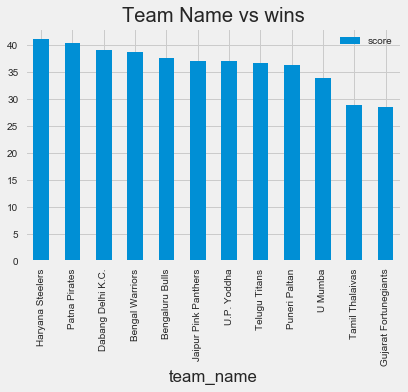

In [81]:
df = pd.DataFrame(df_team_match_season7.groupby(['team_name'])['score'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Team Name vs score')
plt.show()

## Filtering Season 1, 2, 3 and overall data
### Also creating new dataframe to include only Season7 (current season for prediction)

In [75]:
#Since overall and Season 1 to 3 are not required as some of the teams are not participated in Season 1, 2,3.
#Filtering Overall as the information is included in the respective season data
df_team_stats = df_team_data_final3.copy()
df_team_season7 = df_team_data_final3.copy()
df_team_stats = df_team_stats[df_team_stats['Season']!=0]
df_team_stats = df_team_stats[df_team_stats['Season']!=1]
df_team_stats = df_team_stats[df_team_stats['Season']!=2]
df_team_stats = df_team_stats[df_team_stats['Season']!=3]
df_team_stats = df_team_stats[df_team_stats['Season']!=7]
#New DataFrame for Season 7 to analysis and compare for prediction
df_team_season7 = df_team_season7[df_team_season7['Season']==7]
df_team_stats

,team_name,Season,all-outs,total-points,Matches Played,wins,draws,losses,Finishing Position,highest score,...,raid bonus points,Total Raid Points,Total Tackles,successful tackles,unsuccesful tackles,successful tackle %,no. of super tackles,all outs inflicted,total all out points,total defence points
36,Bengaluru Bulls,4,21,415,14,5,1,8,6,33,...,54,201,287,109,178,43,15,9,18,124
37,U Mumba,4,21,418,14,7,1,6,4,38,...,63,227,293,110,183,41,11,15,30,121
38,Puneri Paltan,4,17,491,16,7,2,7,4,41,...,44,290,345,140,205,42,7,21,42,146
39,Dabang Delhi K.C.,4,16,412,14,4,1,9,7,41,...,56,226,306,116,190,44,20,15,30,134
40,Bengal Warriors,4,15,438,14,3,2,9,8,34,...,48,202,318,117,201,39,8,11,22,125
41,Jaipur Pink Panthers,4,14,450,16,9,1,6,3,51,...,49,270,319,119,200,42,17,17,34,135
42,Telugu Titans,4,13,454,16,8,2,6,2,46,...,42,267,364,157,207,44,5,22,44,162
43,Patna Pirates,4,12,466,16,12,0,4,1,38,...,40,264,332,145,187,52,27,19,38,171
44,U Mumba,5,36,757,22,10,0,12,4,51,...,121,419,539,176,363,37,26,21,42,202
45,Dabang Delhi K.C.,5,35,731,22,5,1,16,6,38,...,84,344,497,159,338,34,12,18,36,169


In [58]:
df_team_season7

,team_name,Season,all-outs,total-points,Matches Played,wins,draws,losses,Finishing Position,highest score,...,raid bonus points,Total Raid Points,Total Tackles,successful tackles,unsuccesful tackles,successful tackle %,no. of super tackles,all outs inflicted,total all out points,total defence points
68,Puneri Paltan,7,33,723,20,6,3,11,9,43,...,90,358,549,207,342,42,25,18,36,232
69,Tamil Thalaivas,7,30,695,20,3,3,14,12,39,...,79,344,456,160,296,38,13,14,28,171
70,Bengaluru Bulls,7,24,644,19,10,1,8,4,47,...,98,393,438,168,270,44,25,21,42,191
71,Jaipur Pink Panthers,7,23,644,20,8,2,10,7,44,...,91,337,483,189,294,45,32,19,38,219
72,Patna Pirates,7,23,641,19,6,1,12,9,55,...,70,368,448,168,280,43,23,28,56,191
73,Telugu Titans,7,22,603,18,5,3,10,10,51,...,94,332,413,162,251,44,21,13,26,182
74,U.P. Yoddha,7,22,570,18,10,2,6,4,42,...,70,289,415,177,238,46,16,21,42,192
75,Gujarat Fortunegiants,7,22,591,20,6,2,12,8,50,...,65,320,417,187,230,49,17,21,42,203
76,Haryana Steelers,7,21,626,19,12,1,6,3,47,...,71,377,475,181,294,41,14,27,54,195
77,U Mumba,7,21,561,19,10,1,8,4,47,...,69,325,400,168,232,46,18,26,52,183


## Task 2: Predict the top team in the points table after the completion of the league matches.

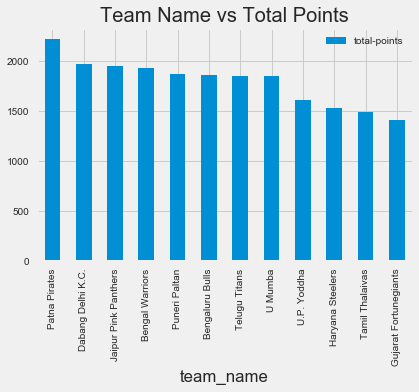

In [79]:
plt.figure(figsize=(18, 6))

df = pd.DataFrame(df_team_stats.groupby(['team_name'])['total-points'].sum().sort_values(ascending = False))
df.plot.bar()
plt.title('Team Name vs Total Points')
plt.show()

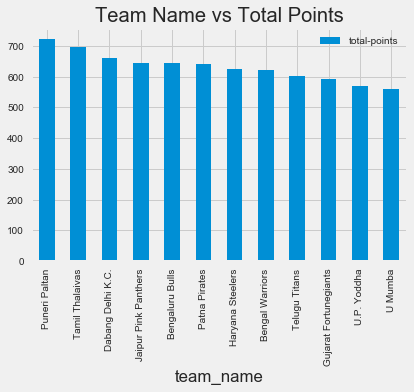

In [78]:
plt.figure(figsize=(18, 6))

df1 = pd.DataFrame(df_team_season7.groupby(['team_name'])['total-points'].sum().sort_values(ascending = False))
df1.plot.bar()
plt.title('Team Name vs Total Points')
plt.show()

### Based on the trending, we can see that Patna Pirates will be in the top of the points list

## Task 3: Predict the team with the highest points for successful raids.

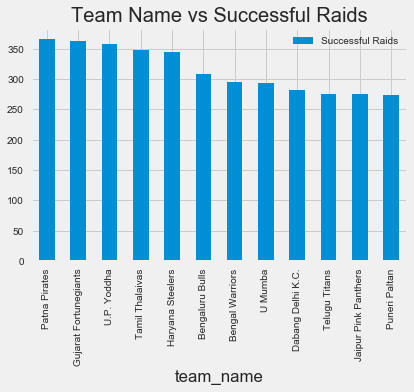

In [82]:
plt.figure(figsize=(18, 6))

df = pd.DataFrame(df_team_stats.groupby(['team_name'])['Successful Raids'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Team Name vs Successful Raids')
plt.show()

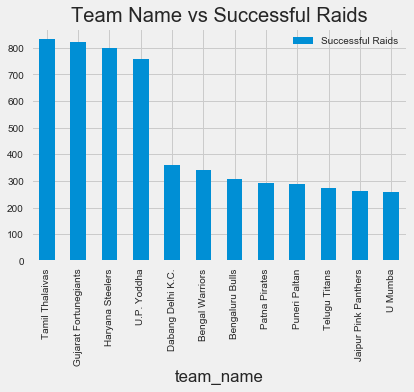

In [83]:
plt.figure(figsize=(18, 6))

df = pd.DataFrame(df_team_season7.groupby(['team_name'])['Successful Raids'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Team Name vs Successful Raids')
plt.show()

### Based on the above analysis we can conclude Gujarat Fortunegiants will be with highest points for successful raids

## Task 4: Predict the team with the highest points for successful tackles.

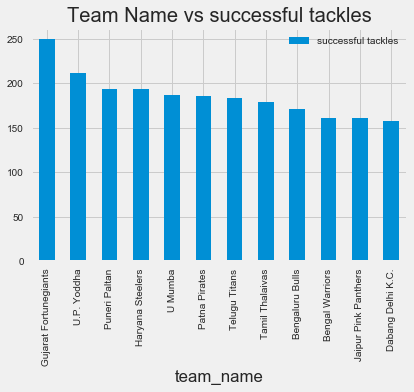

In [84]:

plt.figure(figsize=(18, 6))

df = pd.DataFrame(df_team_stats.groupby(['team_name'])['successful tackles'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Team Name vs successful tackles')
plt.show()

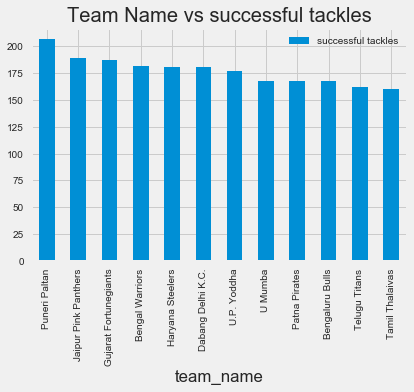

In [85]:
plt.figure(figsize=(18, 6))

df = pd.DataFrame(df_team_season7.groupby(['team_name'])['successful tackles'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Team Name vs successful tackles')
plt.show()

### Based on the above analysis we can conclude Gujarat Fortunegiants will be with highest points for successful raids

## Task 5: Predict the team with the highest super-performance total. 

### The super performance total (S.P.T.) of a team is expressed as:

### S.P.T. = Total number of super-raids in the tournament + total number of super-tackles in the tournament + total number of all-outs inflicted in the tournament - total number of all-outs conceded in the tournament

In [86]:
df_team_stats.columns

Index(['team_name', 'Season', 'all-outs', 'total-points', 'Matches Played',
       'wins', 'draws', 'losses', 'Finishing Position', 'highest score',
       'Biggest Winning Margin', 'Total Raids', 'Successful Raids',
       'unsuccessful raid', 'empty raids', 'success raid %',
       'no. of super raids', 'raid touch points', 'raid bonus points',
       'Total Raid Points', 'Total Tackles', 'successful tackles',
       'unsuccesful tackles', 'successful tackle %', 'no. of super tackles',
       'all outs inflicted', 'total all out points', 'total defence points'],
      dtype='object')

In [87]:
#Calculating SPT
df_team_stats['SPT'] = df_team_stats['no. of super raids'] + df_team_stats['no. of super tackles'] + df_team_stats['all outs inflicted'] - df_team_stats['all-outs']
df_team_stats['SPT'] 

36     7
37     9
38    21
39    30
40     8
41    26
42    21
43    41
44    21
45     1
46    33
47    10
48    21
49    79
50    18
51    26
52    25
53    37
54    42
55    42
56    10
57    28
58    27
59    33
60    26
61    38
62    15
63    35
64    45
65    32
66    44
67    55
Name: SPT, dtype: int64

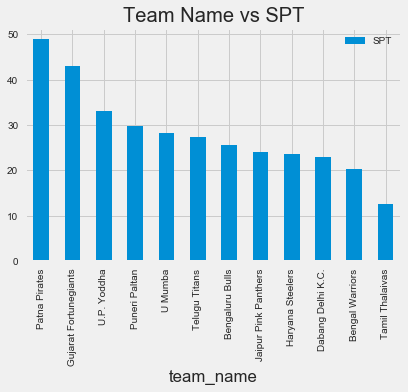

In [88]:

plt.figure(figsize=(18, 6))

df = pd.DataFrame(df_team_stats.groupby(['team_name'])['SPT'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Team Name vs SPT')
plt.show()

In [89]:
#Calculating SPT
df_team_season7['SPT'] = df_team_season7['no. of super raids'] + df_team_season7['no. of super tackles'] + df_team_season7['all outs inflicted'] - df_team_season7['all-outs']
df_team_season7['SPT']

68    16
69     1
70    30
71    35
72    41
73    21
74    20
75    21
76    34
77    30
78    32
79    44
Name: SPT, dtype: int64

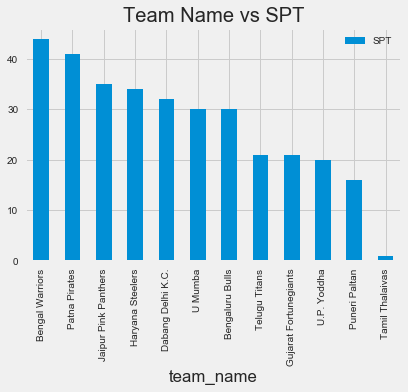

In [90]:
plt.figure(figsize=(18, 6))

df = pd.DataFrame(df_team_season7.groupby(['team_name'])['SPT'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Team Name vs SPT')
plt.show()

### Based on the above analysis Patna Pirates will be the top in the super performance total (S.P.T.)

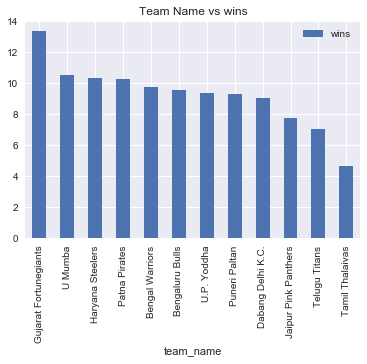

In [34]:
plt.figure(figsize=(18, 6))

df = pd.DataFrame(df_team_stats.groupby(['team_name'])['wins'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Team Name vs wins')
plt.show()

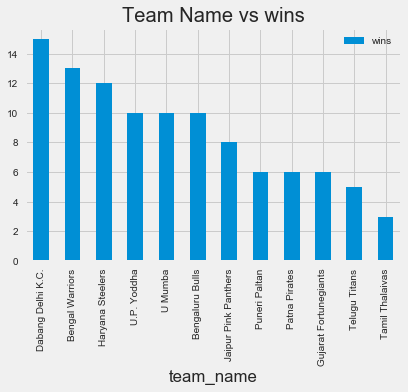

In [91]:
plt.figure(figsize=(18, 6))

df = pd.DataFrame(df_team_season7.groupby(['team_name'])['wins'].sum().sort_values(ascending = False))
df.plot.bar()
plt.title('Team Name vs wins')
plt.show()

### Number of wins also showing the trend that Bengal Warriors will be the winner of the season7

##  Player Analysis for prediction using simple EDA 

## Task 6: Predict the player with the highest SUCCESSFUL RAID percentage. 

In [92]:
#Importing player data for total points
player_total_points_0 = pd.read_csv("prokabaddi_total-points_0.csv")
player_total_points_1 = pd.read_csv("prokabaddi_total-points_1.csv")
player_total_points_2 = pd.read_csv("prokabaddi_total-points_2.csv")
player_total_points_3 = pd.read_csv("prokabaddi_total-points_3.csv")
player_total_points_4 = pd.read_csv("prokabaddi_total-points_4.csv")
player_total_points_5 = pd.read_csv("prokabaddi_total-points_5.csv")
player_total_points_6 = pd.read_csv("prokabaddi_total-points_6.csv")
player_total_points_7 = pd.read_csv("prokabaddi_total-points_7.csv")

In [93]:
#Importing successful raids
successful_raids_0 = pd.read_csv("prokabaddi_successful-raids_0.csv")
successful_raids_1 = pd.read_csv("prokabaddi_successful-raids_1.csv")
successful_raids_2 = pd.read_csv("prokabaddi_successful-raids_2.csv")
successful_raids_3 = pd.read_csv("prokabaddi_successful-raids_3.csv")
successful_raids_4 = pd.read_csv("prokabaddi_successful-raids_4.csv")
successful_raids_5 = pd.read_csv("prokabaddi_successful-raids_5.csv")
successful_raids_6 = pd.read_csv("prokabaddi_successful-raids_6.csv")
successful_raids_7 = pd.read_csv("prokabaddi_successful-raids_7.csv")

In [94]:
#Import player data for successfull tackles
successful_tackles_0 = pd.read_csv("prokabaddi_successful-tackles_0.csv")
successful_tackles_1 = pd.read_csv("prokabaddi_successful-tackles_1.csv")
successful_tackles_2 = pd.read_csv("prokabaddi_successful-tackles_2.csv")
successful_tackles_3 = pd.read_csv("prokabaddi_successful-tackles_3.csv")
successful_tackles_4 = pd.read_csv("prokabaddi_successful-tackles_4.csv")
successful_tackles_5 = pd.read_csv("prokabaddi_successful-tackles_5.csv")
successful_tackles_6 = pd.read_csv("prokabaddi_successful-tackles_6.csv")
successful_tackles_7 = pd.read_csv("prokabaddi_successful-tackles_7.csv")

## Task 6: Predict the player with the highest SUCCESSFUL RAID percentage. 

In [95]:
#Use only the overall season to find the % of successful raids
successful_raids_0['avg_successful_raids'] = successful_raids_0['successful-raids']/successful_raids_0['matches_played']
df_successful_raids_0 = successful_raids_0[successful_raids_0['avg_successful_raids'] > 5]
df_successful_raids_0.sort_values(['avg_successful_raids'], ascending=False)

,player_name,season,matches_played,team,successful-raids,avg_successful_raids
13,Naveen Kumar,1,42,dabang-delhi-kc,357,8.500000
0,Pardeep Narwal,1,104,patna-pirates,836,8.038462
15,Siddharth Sirish Desai,1,39,telugu-titans,312,8.000000
4,Maninder Singh,1,79,bengal-warriors,586,7.417722
1,Rahul Chaudhari,1,120,tamil-thalaivas,776,6.466667
5,Rohit Kumar,1,89,bengaluru-bulls,545,6.123596
7,Pawan Kumar Sehrawat,1,75,bengaluru-bulls,445,5.933333
16,Vikash Kandola,1,51,haryana-steelers,302,5.921569
2,Deepak Niwas Hooda,1,123,jaipur-pink-panthers,698,5.674797
14,Sachin Tanwar,1,63,gujarat-fortunegiants,356,5.650794


In [96]:
#for season 7 only
successful_raids_7['avg_successful_raids'] = successful_raids_7['successful-raids']/successful_raids_7['matches_played']
df_successful_raids_7 = successful_raids_7[successful_raids_7['avg_successful_raids'] > 5]
df_successful_raids_7.sort_values(['avg_successful_raids'], ascending=False)

,player_name,season,matches_played,team,successful-raids,avg_successful_raids
0,Naveen Kumar,1,20,dabang-delhi-kc,213,10.650000
1,Pardeep Narwal,1,19,patna-pirates,190,10.000000
2,Pawan Kumar Sehrawat,1,19,bengaluru-bulls,187,9.842105
3,Maninder Singh,1,20,bengal-warriors,171,8.550000
4,Siddharth Sirish Desai,1,18,telugu-titans,143,7.944444
5,Vikash Kandola,1,16,haryana-steelers,119,7.437500
7,Abhishek Singh,1,17,u-mumba,103,6.058824
6,Deepak Niwas Hooda,1,20,jaipur-pink-panthers,113,5.650000
12,Pankaj Mohite,1,16,puneri-paltan,84,5.250000
10,V. Ajith Kumar,1,17,tamil-thalaivas,89,5.235294


### We can clearly see that Pardeep Narwal will be scoring highest % of Successful raids in Season 7

In [97]:
#Calculate the average for tackles for overall season
successful_tackles_0['avg_successful-tackles'] = successful_tackles_0['successful-tackles']/successful_tackles_0['matches_played']
df3 = successful_tackles_0[successful_tackles_0['avg_successful-tackles'] > 2]
df3.sort_values(['avg_successful-tackles'], ascending=False)

,player_name,season,matches_played,team,successful-tackles,avg_successful-tackles
55,Sandeep Kandola,1,16,telugu-titans,55,3.437500
49,Sumit,1,18,up-yoddha,60,3.333333
0,Manjeet Chhillar,1,108,tamil-thalaivas,324,3.000000
15,Vishal Bhardwaj,1,59,telugu-titans,177,3.000000
14,Nitesh Kumar,1,62,up-yoddha,182,2.935484
10,Surender Nada,1,71,haryana-steelers,206,2.901408
13,Sandeep Kumar Dhull,1,64,jaipur-pink-panthers,183,2.859375
2,Fazel Atrachali,1,98,u-mumba,277,2.826531
1,Ravinder Pahal,1,109,dabang-delhi-kc,301,2.761468
5,PO Surjeet Singh,1,92,puneri-paltan,250,2.717391


In [98]:
#for Season 7 only
successful_tackles_7['avg_successful-tackles'] = successful_tackles_7['successful-tackles']/successful_tackles_7['matches_played']
df4 = successful_tackles_7[successful_tackles_7['avg_successful-tackles'] > 2]
df4.sort_values(['avg_successful-tackles'], ascending=False)

,player_name,season,matches_played,team,successful-tackles,avg_successful-tackles
1,Sumit,1,18,up-yoddha,60,3.333333
0,Sandeep Kumar Dhull,1,20,jaipur-pink-panthers,60,3.000000
3,Fazel Atrachali,1,19,u-mumba,57,3.000000
5,Vishal Bhardwaj,1,18,telugu-titans,52,2.888889
2,Ravinder Pahal,1,20,dabang-delhi-kc,57,2.850000
4,Baldev Singh,1,20,bengal-warriors,54,2.700000
11,Sunil,1,17,haryana-steelers,45,2.647059
6,Rinku Narwal,1,20,bengal-warriors,51,2.550000
7,Neeraj Kumar,1,19,patna-pirates,47,2.473684
12,Nitesh Kumar,1,18,up-yoddha,44,2.444444


### Based on the above analysis we can clearly see that Vishal Bhardwaj will secure the top position for SUCCESSFUL TACKLE percentage in Season 7

## END of Predictions
# by Hariharan M S, Ganesh and Shankar for Upgrad Hackathon Oct 2019